## **Bivariate Analysis Summary**

**Goals:**

- *Identify Relationships:* Between numerical variables, categorical variables, and across different types.
- *Detect Patterns:* Such as correlations, significant associations, or dependencies.
- *Document Insights:* Note any interesting patterns, correlations, or potential issues that could affect the merging and further analysis.

**Techniques:**

- *Scatter Plots:* For numerical vs. numerical relationships.
- *Correlation Matrices:* For quantifying relationships between numerical variables.
- *Box Plots:* For comparing numerical distributions across categories.
- *Contingency Tables and Chi-square Tests:* For relationships between categorical variables.


In [51]:
#import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#load the data

client_profiles = '/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_final_demo.csv'
digital_footprint1 = '/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_final_web_data_pt_1.csv'
digital_footprint2 = '/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_final_web_data_pt_2.csv'
experiment_roster = '/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_final_experiment_clients.csv'


## Client profiles (df_final_demo)

In [52]:
df_final_demo = pd.read_csv(client_profiles)

df_final_demo.sample(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
69326,304098,17.0,205.0,45.5,F,2.0,20759.41,7.0,7.0
28625,5081291,10.0,130.0,33.5,F,2.0,24539.50,3.0,6.0
41099,5559264,6.0,74.0,41.5,U,2.0,44965.20,1.0,4.0
4339,8203595,5.0,61.0,58.0,F,2.0,31804.02,1.0,4.0
37513,3229964,10.0,123.0,68.5,F,2.0,168384.99,5.0,8.0
45521,7555845,8.0,105.0,29.5,M,2.0,49350.27,0.0,3.0
7148,7544723,8.0,103.0,54.5,F,2.0,58074.84,2.0,5.0
58197,2196554,5.0,70.0,19.5,U,2.0,27632.99,1.0,1.0
51756,8776163,7.0,85.0,37.5,M,2.0,21321.62,1.0,1.0
57512,8864353,10.0,130.0,59.0,F,2.0,27340.42,2.0,2.0


## A pairplot consists of the following elements:

- Diagonals: These are histograms or kernel density plots (KDEs) representing the distribution of each individual variable.
- Off-Diagonals: These are scatter plots showing pairwise relationships between variables.



- **Purpose:** Visualize pairwise relationships between multiple numerical variables simultaneously.
- **When to Use:** When exploring relationships within a dataset with several numerical variables.
- **Example:** Relationships among clnt_age, bal, num_accts, etc.

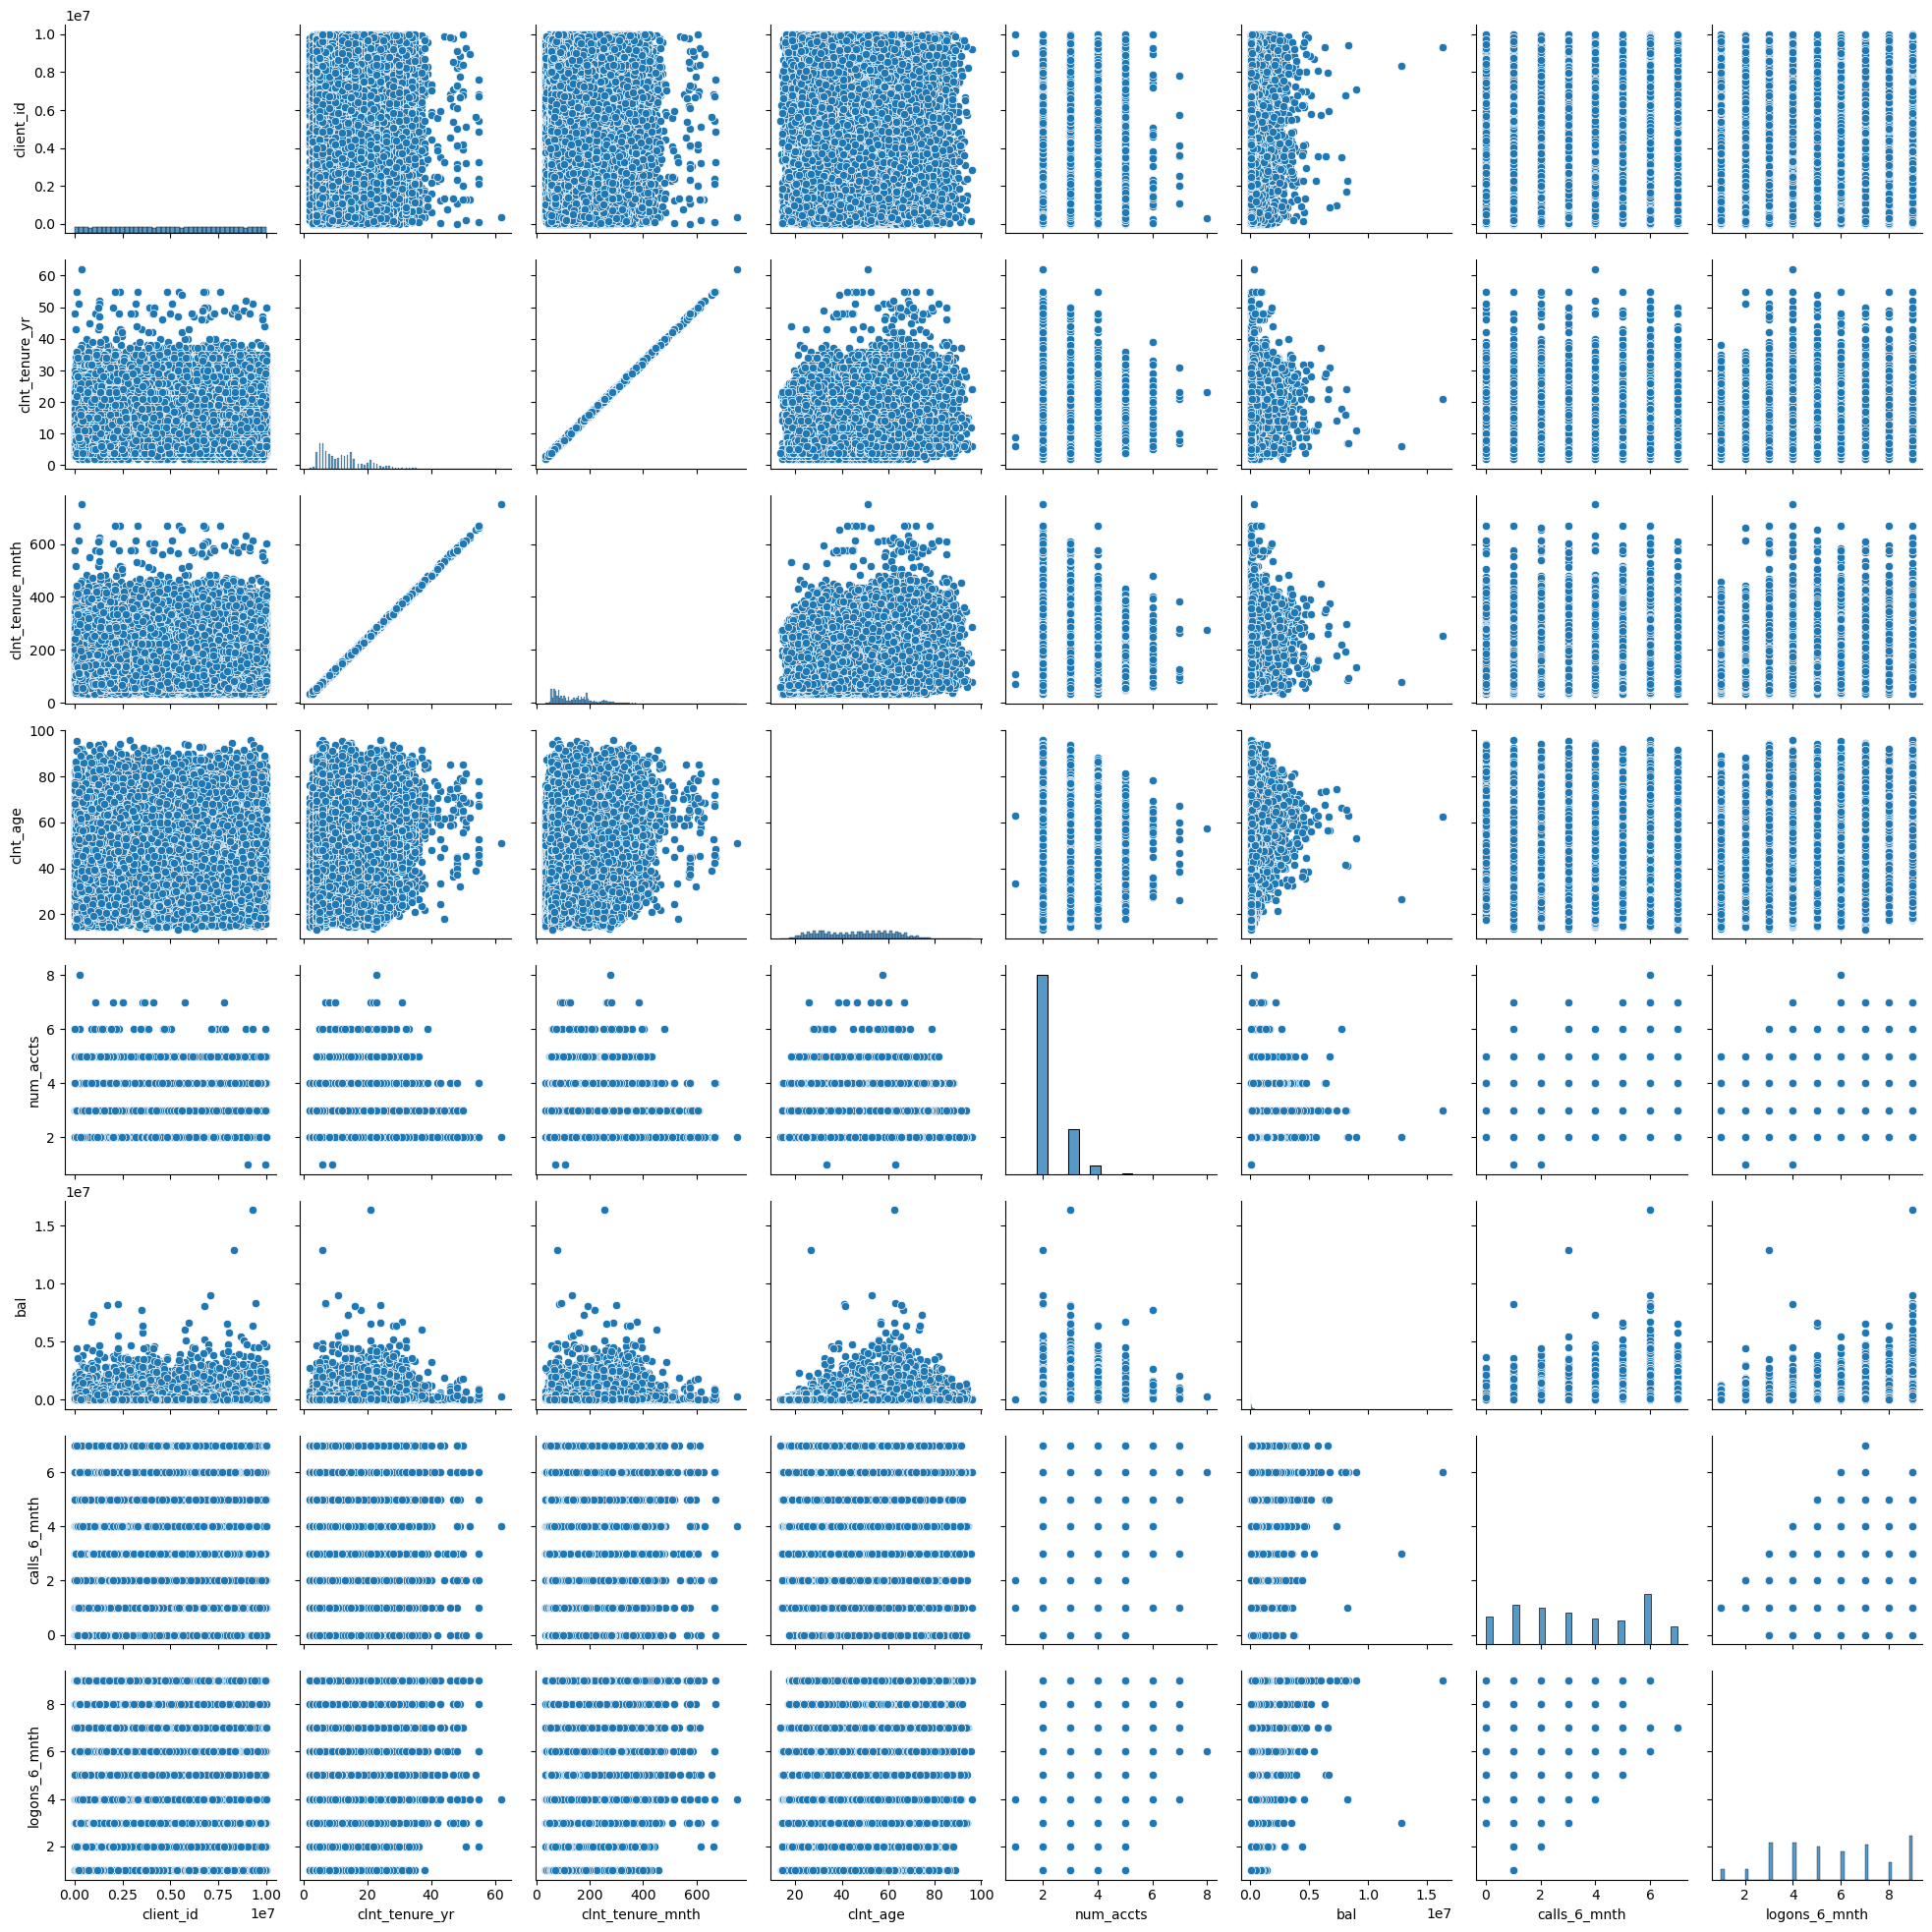

In [53]:
sns.pairplot(df_final_demo)
plt.show()

#### Summary of Findings

**Strong Relationships:**

- clnt_tenure_yr and clnt_tenure_mnth have a strong positive correlation (as expected).

**Weak/No Relationships:**

- clnt_tenure_yr and clnt_age show no clear relationship.
- num_accts and clnt_age, bal, calls_6_mnth, logons_6_mnth show no clear relationship.
- calls_6_mnth and logons_6_mnth show no clear relationship.
- Possible Weak Correlations:
- clnt_age vs. bal: Older clients might have slightly higher balances.
- num_accts vs. bal: More accounts might correlate with higher balances.

## Correlation Matrix: 

- Calculate the correlation matrix to quantify these relationships.

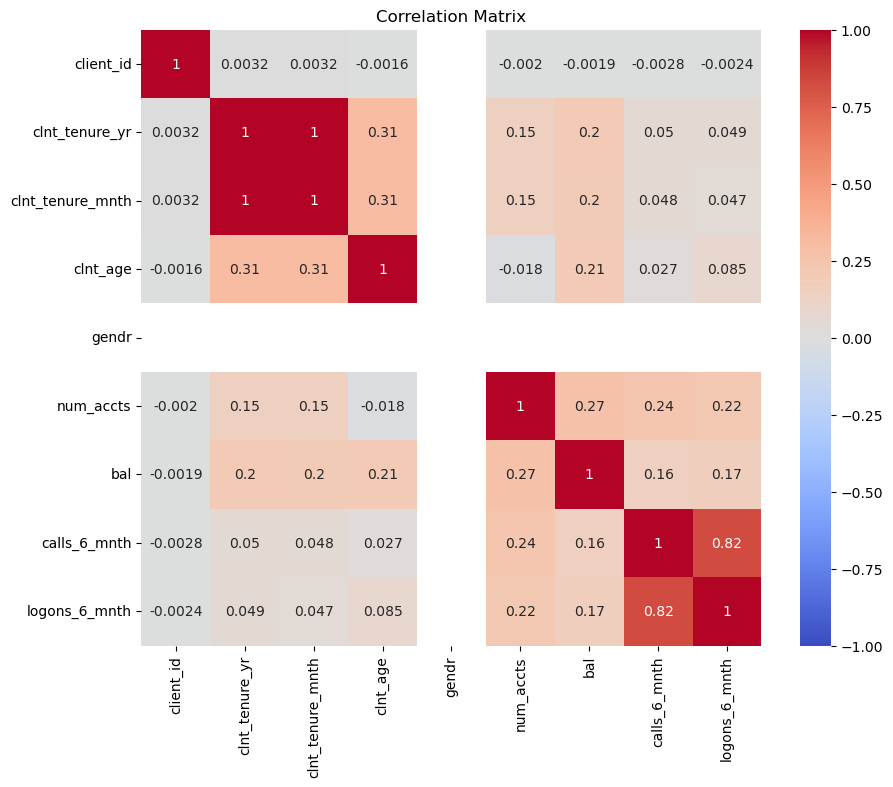

In [54]:
# Convert non-numeric values to NaN
df_final_demo_numeric = df_final_demo.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
correlation_matrix = df_final_demo_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Observations from the Heatmap:

1.	clnt_tenure_yr and clnt_tenure_mnth:

Correlation: 1.0
Interpretation: As expected, these two variables are perfectly correlated since tenure in months is directly derived from tenure in years.

2.	clnt_age and clnt_tenure_yr/clnt_tenure_mnth:
Correlation: 0.31
Interpretation: There is a moderate positive correlation, indicating that older clients tend to have longer tenure.
	
3.	num_accts and bal:

Correlation: 0.27
Interpretation: There is a weak positive correlation, suggesting that clients with more accounts tend to have higher balances.
	
4. calls_6_mnth and logons_6_mnth:

Correlation: 0.82
Interpretation: There is a strong positive correlation, indicating that clients who make more calls also tend to log on more frequently.

5.	Other Correlations:

The correlations between other pairs of variables are generally weak (close to 0), indicating that there are no strong linear relationships among these pairs.

## Box Plots: 

- Identified outliers in numerical variables.

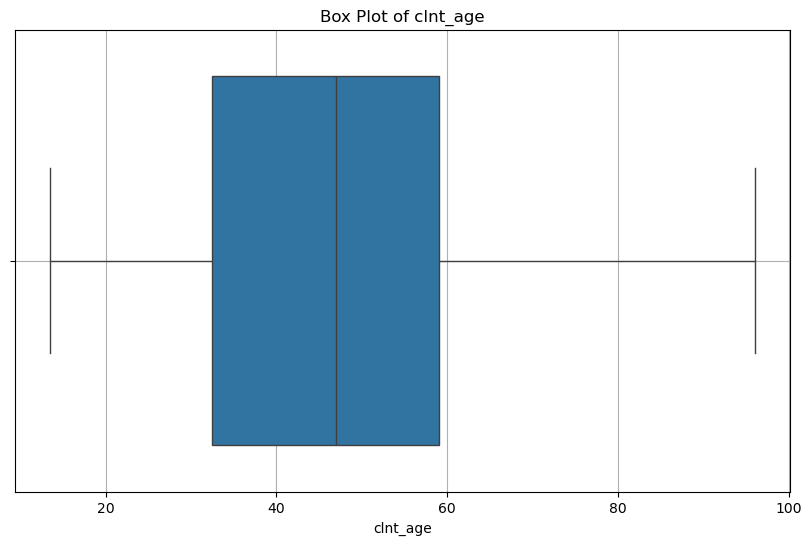

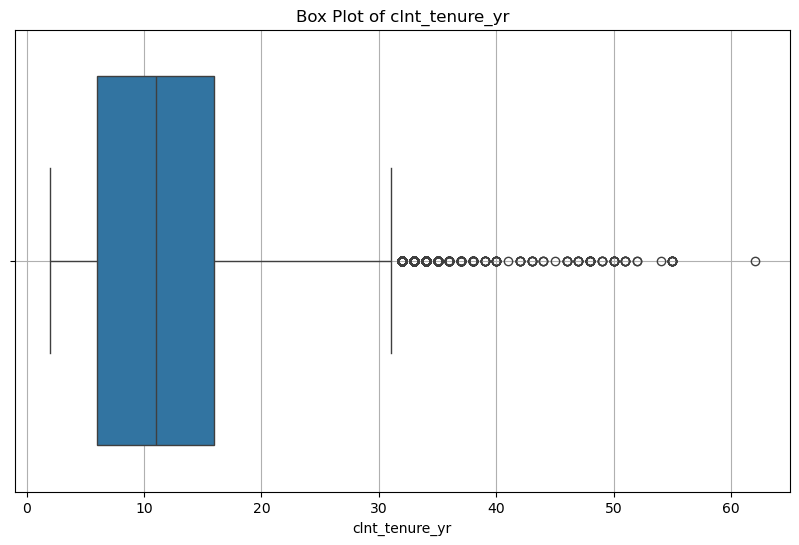

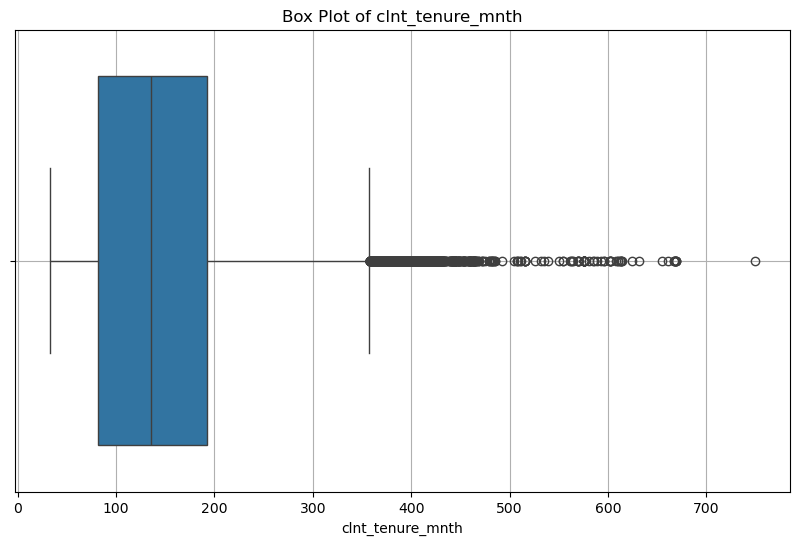

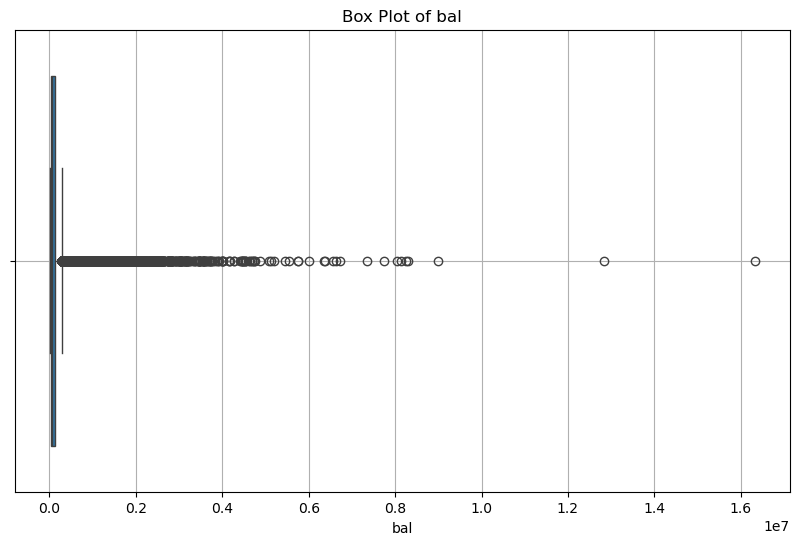

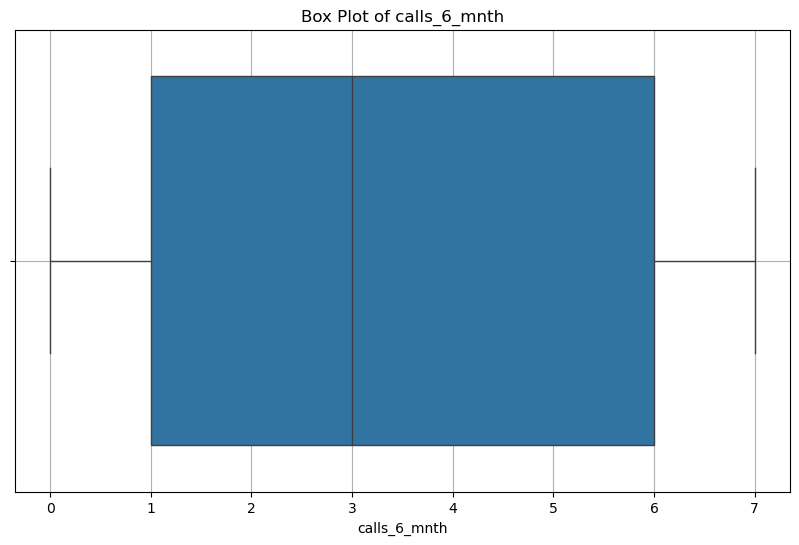

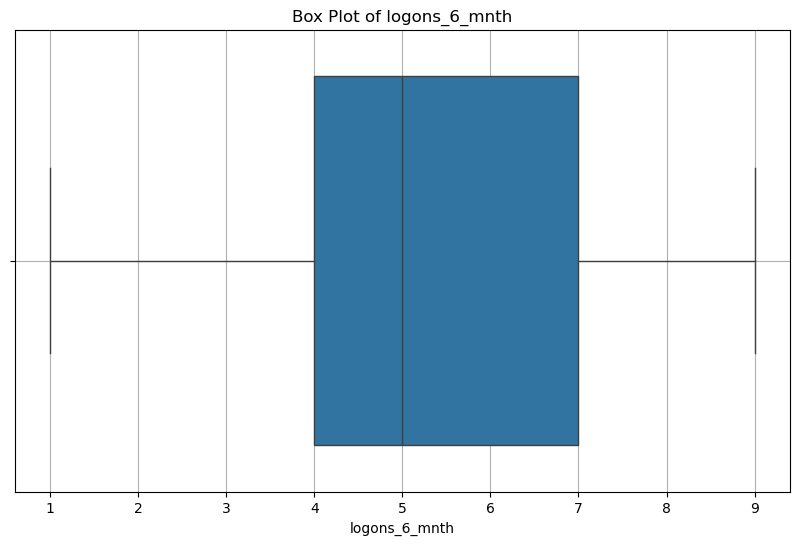

In [55]:
# Box plot for each numerical variable
numerical_columns = ['clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'bal', 'calls_6_mnth', 'logons_6_mnth']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_final_demo[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [56]:
# Function to identify outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for each numerical column
for col in numerical_columns:
    outliers = identify_outliers_iqr(df_final_demo, col)
    print(f'Outliers in {col}: {outliers.shape[0]}')

Outliers in clnt_age: 0
Outliers in clnt_tenure_yr: 870
Outliers in clnt_tenure_mnth: 1423
Outliers in bal: 8018
Outliers in calls_6_mnth: 0
Outliers in logons_6_mnth: 0


## Analyze Categorical vs. Numerical Relationships

- If you have categorical variables in your dataset, such as gendr, it’s important to see how these categories affect numerical variables like bal, clnt_age, etc.

## Box Plot for categorical vs numerical variables

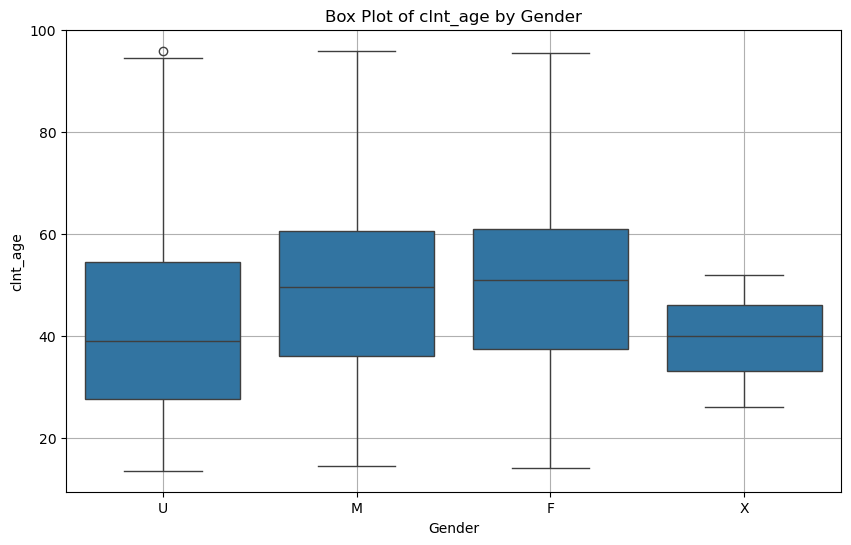

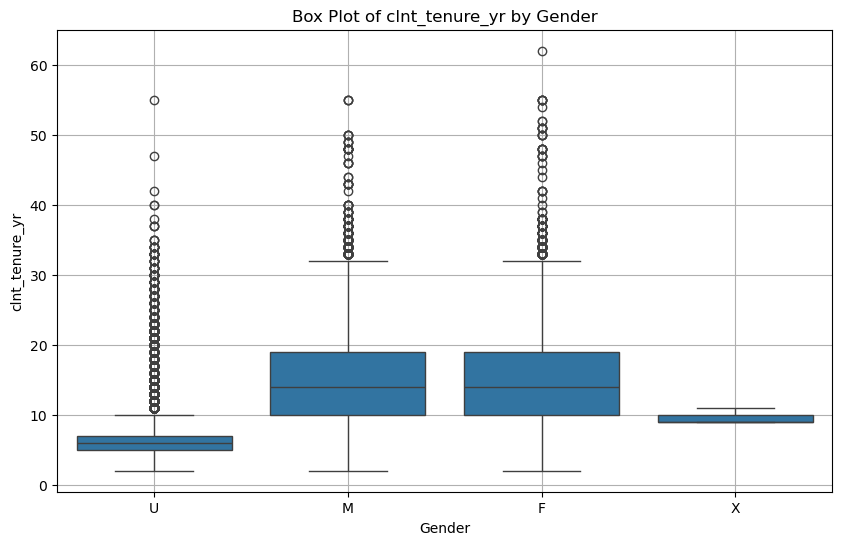

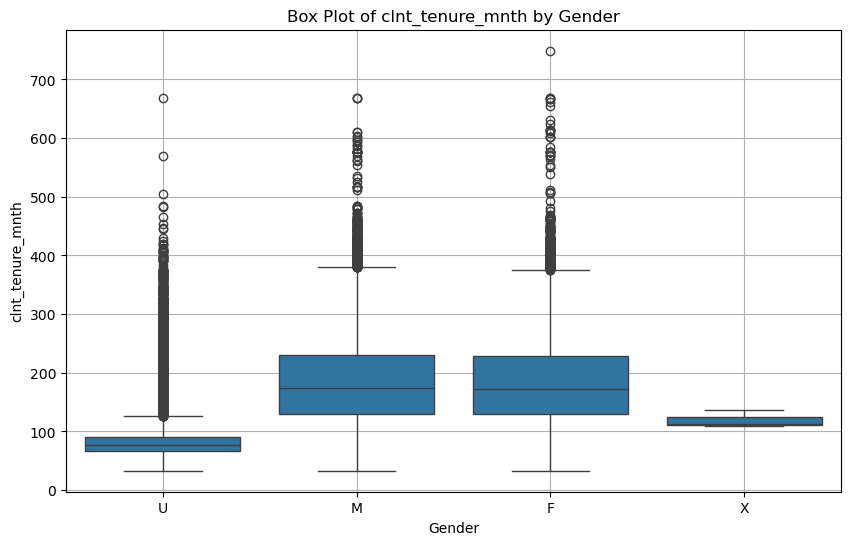

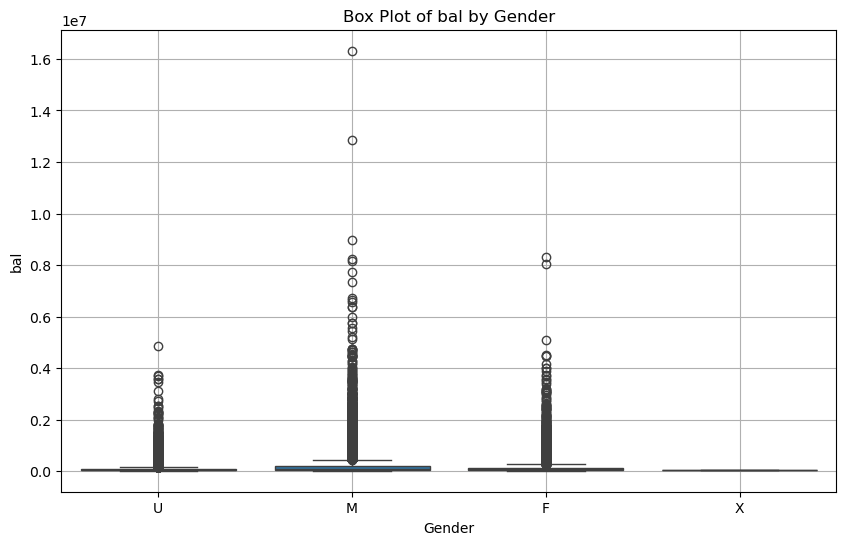

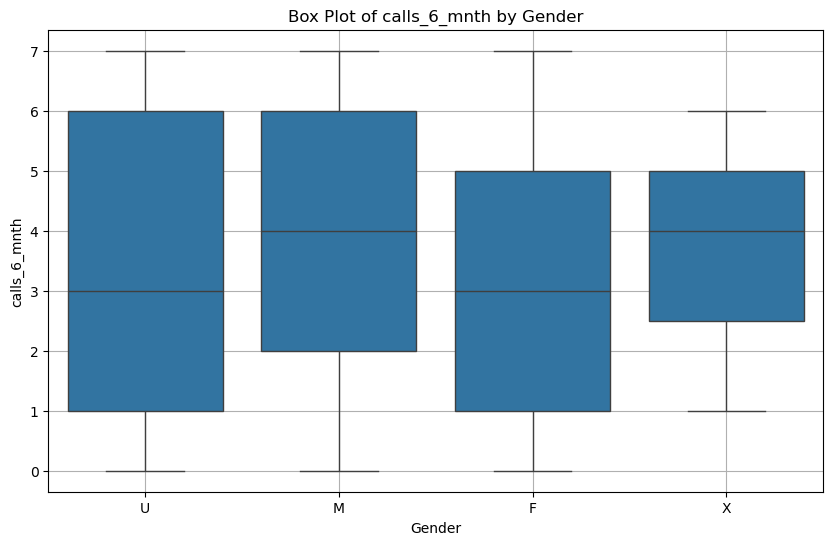

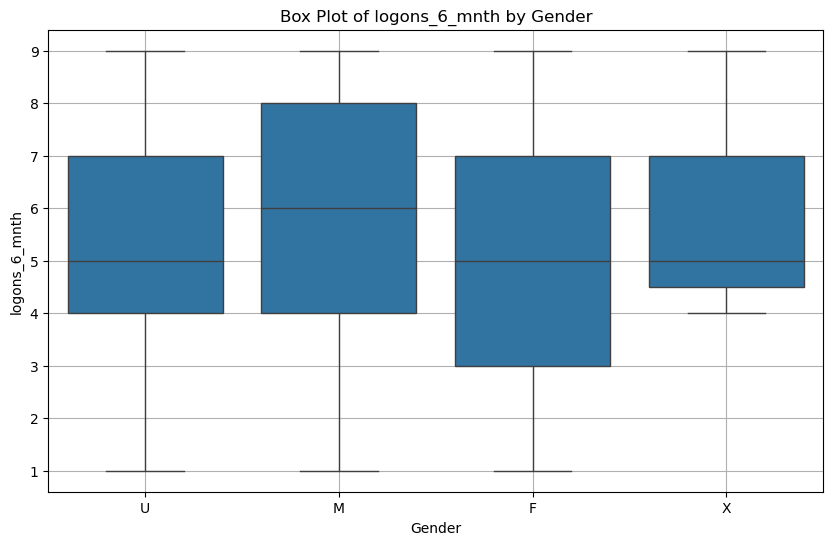

In [57]:
# Box plot for gender across columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gendr', y=col, data=df_final_demo)
    plt.title(f'Box Plot of {col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

### Obervations of Box Plots (Categorical vs. Numerical):

- Significant outliers observed in bal, clnt_tenure_yr, and clnt_tenure_mnth across different gender categories.
- Most values for bal are clustered near the lower end, with significant outliers in all gender categories.
- clnt_tenure_yr and clnt_tenure_mnth show similar patterns with longer tenure observed in categories M and F.

#### Purpose of Contingency Tables

1.  Understand Frequency Distribution:

- A contingency table provides a clear, tabular representation of how the categories of one variable are distributed across the categories of another variable.
- It helps in identifying patterns and interactions between the categorical variables.

2.	Identify Associations:

- By examining the frequencies, you can visually assess if certain categories of one variable are associated with certain categories of another variable.
- For instance, you can see if a particular gender tends to have more accounts in a specific range.

3.  Meaning of Low, Medium, and High:

- Low: Clients with 0-1 accounts.
- Medium: Clients with 2-3 accounts.
- High: Clients with 4 or more accounts.


In [58]:
# Assuming df is your dataframe
# Create a new categorical variable 'num_accts_group'
bins = [0, 1, 3, np.inf]
labels = ['Low', 'Medium', 'High']
df_final_demo['num_accts_group'] = pd.cut(df_final_demo['num_accts'], bins=bins, labels=labels, right=False)

# Create a contingency table
contingency_table = pd.crosstab(df_final_demo['gendr'], df_final_demo['num_accts_group'])
print('Contingency Table:')
print(contingency_table)

Contingency Table:
num_accts_group  Medium  High
gendr                        
F                 18380  4366
M                 17373  6351
U                 19744  4378
X                     2     1


In [59]:
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square Statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

Chi-square Statistic: 624.6675118837034
P-value: 4.525133359733576e-135
Degrees of Freedom: 3
Expected Frequencies:
[[1.78820066e+04 4.86399343e+03]
 [1.86508715e+04 5.07312847e+03]
 [1.89637634e+04 5.15823659e+03]
 [2.35848148e+00 6.41518521e-01]]


#### Interpretation

1. Chi-square Statistic: The value of 624.667 indicates a significant deviation between the observed and expected frequencies.

2.	P-value: The p-value 4.525 \times 10^{-135} is extremely small, much less than the typical threshold of 0.05. This suggests that the observed association between gendr and num_accts_group is highly unlikely to be due to chance.

3.	Degrees of Freedom: 3, which corresponds to the number of categories in gendr minus one, multiplied by the number of categories in num_accts_group minus one.
	
4.	Expected Frequencies: The expected counts if there were no association between gendr and num_accts_group.

# *Summary of completed bivariate analysis for the first dataset(df_final_demo):*

1.	Pair Plot:
- Visualized relationships between all pairs of numerical variables.
- Identified a strong relationship between clnt_tenure_yr and clnt_tenure_mnth.
	
2.	Correlation Heatmap:

- Quantified the strength of relationships between numerical variables.
- Noted a strong correlation between clnt_tenure_yr and clnt_tenure_mnth, and a moderate correlation between calls_6_mnth and logons_6_mnth.

3.	Outliers Identification:

- Identified significant outliers in clnt_tenure_yr, clnt_tenure_mnth, and bal.
- Noted the number of outliers in each variable.
	
4.	Box Plots (Categorical vs. Numerical):
		
- Created box plots for numerical variables against gendr.
- Observed significant outliers in bal, clnt_tenure_yr, and clnt_tenure_mnth across different gender categories.

5.	Contingency Table and Chi-Square Test:

- Created a contingency table for gendr and num_accts_group.
- Performed a chi-square test to determine the association between gendr and num_accts_group.
- Combined X into U to form Other/Unknown and re-evaluated the chi-square test.
- Found a significant association between gendr_combined and num_accts_group.

## Digital_footprint1

In [60]:
#import the data

df_digital1 = pd.read_csv(digital_footprint1)

df_digital1.sample(10)

,client_id,visitor_id,visit_id,process_step,date_time
245072,7511753,166755760_29567167804,833313192_82769761393_517373,step_2,2017-03-30 13:02:20
135733,4359068,921401890_87217239607,210621492_66828463850_366131,step_3,2017-04-04 18:43:15
169312,3105810,249539463_92670967582,494287517_15913410482_768414,start,2017-03-29 11:32:06
31837,9487202,996283195_15035279286,331453317_21507415782_455827,start,2017-04-19 22:04:28
303672,6374753,520072302_36167771696,886366752_29037438262_693070,step_1,2017-03-29 11:18:48
313587,3409931,325839445_93549201632,613778766_54633777120_558989,step_2,2017-04-06 11:00:38
330078,2484247,918462970_39670054674,561122385_32844313966_829622,step_3,2017-04-15 21:39:45
339035,7875474,481917425_63817264570,983894023_85018164703_481249,step_1,2017-03-29 11:35:16
150628,5629211,158700046_1073556552,332779582_13670906811_709782,confirm,2017-04-05 13:50:20
79825,7074464,951274535_72714196360,663252022_54925491498_898865,step_1,2017-04-09 17:53:45


### Steps for Bivariate Analysis

1.	Correlation Heatmap:

- Not applicable here since process_step and date_time are not numerical variables for which correlation makes sense in this context.

2.	Pair Plots:

- Not applicable here for the same reason as above.
	
3.	Box Plots (Categorical vs. Numerical):

- If you have any numerical data, which in this case seems not applicable.

4.	Contingency Tables and Chi-Square Tests (Categorical vs. Categorical):

- Create contingency tables to explore the relationship between process_step and another categorical variable if available. If not, we can still create a contingency table to see the frequency distribution of process_step.


process_step
start      108910
step_1      73432
step_2      61768
step_3      53628
confirm     45403
Name: count, dtype: int64


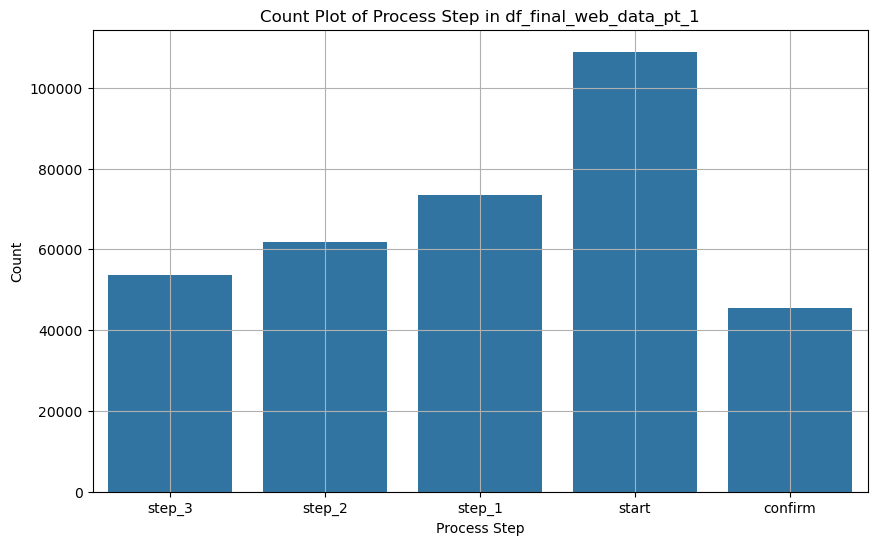

In [61]:
print(df_digital1['process_step'].value_counts())

# Bar plots for process_step in df_digital1

plt.figure(figsize=(10, 6))
sns.countplot(x='process_step', data=df_digital1)
plt.title('Count Plot of Process Step in df_final_web_data_pt_1')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [62]:
# Convert 'date_time' to datetime format

df_digital1['date_time'] = pd.to_datetime(df_digital1['date_time'])

# Extract date-time components

df_digital1['hour'] = df_digital1['date_time'].dt.hour
df_digital1['day_of_week'] = df_digital1['date_time'].dt.dayofweek
df_digital1['month'] = df_digital1['date_time'].dt.month



## Analyze Process Step vs. Time Components

### Process Step vs. Hour of the Day

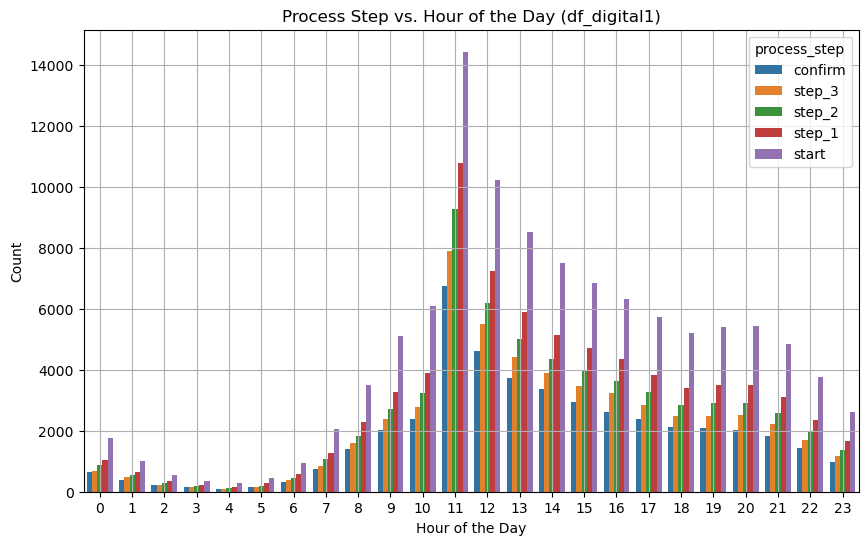

In [63]:
# Process Step vs. Hour of the Day for df_digital1

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='process_step', data=df_digital1)
plt.title('Process Step vs. Hour of the Day (df_digital1)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Process Step vs. Day of the Week

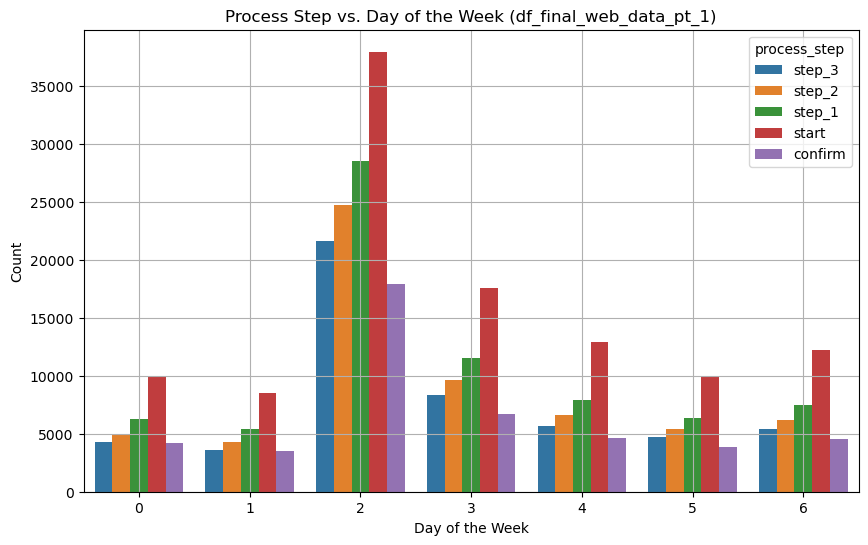

In [64]:
# Process Step vs. Day of the Week for df_digital1

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='process_step', data=df_digital1)
plt.title('Process Step vs. Day of the Week (df_final_web_data_pt_1)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Process Step vs. Month

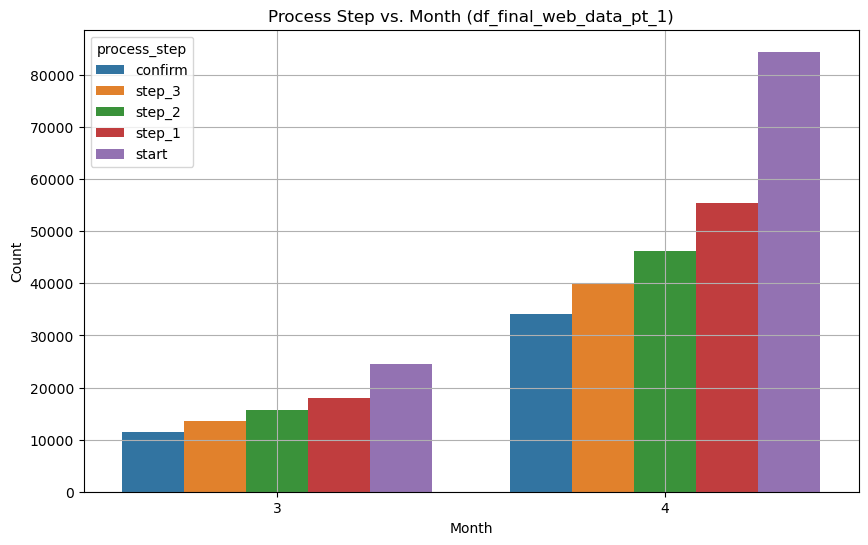

In [65]:
# Process Step vs. Month for df_digital1

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='process_step', data=df_digital1)
plt.title('Process Step vs. Month (df_final_web_data_pt_1)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Contingency table and chi-square test for process_step and month

In [66]:
# Create a contingency table for process_step in df_digital1

contingency_table_1 = pd.crosstab(df_digital1['process_step'], df_digital1['process_step'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)
print(f'Chi-square test for df_final_web_data_pt_1: chi2 = {chi2_1}, p-value = {p_1}, dof = {dof_1}')
print('Expected Frequencies for df_final_web_data_pt_1:')
print(expected_1)

Chi-square test for df_final_web_data_pt_1: chi2 = 1372564.0, p-value = 0.0, dof = 16
Expected Frequencies for df_final_web_data_pt_1:
[[ 6007.53745253 14410.52141831  9716.21897704  8172.88666758
   7095.83548454]
 [14410.52141831 34567.09661626 23306.6847739  19604.63156545
  17021.06562608]
 [ 9716.21897704 23306.6847739  15714.41076409 13218.32067867
  11476.3648063 ]
 [ 8172.88666758 19604.63156545 13218.32067867 11118.71162
   9653.44946829]
 [ 7095.83548454 17021.06562608 11476.3648063   9653.44946829
   8381.28461478]]


#### Observations:


1. Chi-square Statistic: The value of 1,372,564.0 is extremely high, indicating a significant deviation between the observed and expected frequencies.

2.	P-value: The p-value is 0.0, which is less than the typical significance level of 0.05. This indicates that the observed association between the variables is statistically significant and not due to random chance.

3.	Degrees of Freedom (dof): There are 16 degrees of freedom, which corresponds to the number of categories minus one for each variable.

4.	Expected Frequencies: These are the frequencies we would expect if there were no association between the variables.

# Digital_footprint2

In [67]:
#import the data

df_digital2 = pd.read_csv(digital_footprint2)

df_digital2.sample(10)

,client_id,visitor_id,visit_id,process_step,date_time
410824,6196614,790321703_47049564711,982431016_75681556016_988309,step_3,2017-05-28 17:19:50
369417,5285293,650740542_1309380198,415956230_10654477418_992739,step_2,2017-06-09 17:24:33
64081,9309935,438190760_11504820225,987781679_52845935265_62713,step_3,2017-05-28 13:39:25
365299,1335175,48084611_58128577415,721206280_65640348591_790542,step_1,2017-06-14 12:16:45
100081,7258360,63729930_14848043650,681387807_62339591719_404448,step_1,2017-06-01 12:53:29
376104,9161330,687670693_80360179169,621083167_1026230531_405011,start,2017-05-02 13:13:48
289774,7300276,641598677_78698585589,684248263_92563606825_3734,step_1,2017-06-14 12:37:45
98936,211380,238263116_28415653295,979417723_3575775725_443484,step_1,2017-05-15 15:54:56
249562,711638,600885207_52729539603,78495431_69729920793_765692,confirm,2017-06-14 14:00:22
358222,8575731,942562937_13189502198,595614730_3529656439_373102,start,2017-06-03 10:22:23


### Steps for Bivariate Analysis

1.	Correlation Heatmap:

- Not applicable here since process_step and date_time are not numerical variables for which correlation makes sense in this context.

2.	Pair Plots:

- Not applicable here for the same reason as above.
	
3.	Box Plots (Categorical vs. Numerical):

- If you have any numerical data, which in this case seems not applicable.

4.	Contingency Tables and Chi-Square Tests (Categorical vs. Categorical):

- Create contingency tables to explore the relationship between process_step and another categorical variable if available. If not, we can still create a contingency table to see the frequency distribution of process_step.

process_step
start      135035
step_1      89761
step_2      71294
step_3      58614
confirm     57560
Name: count, dtype: int64


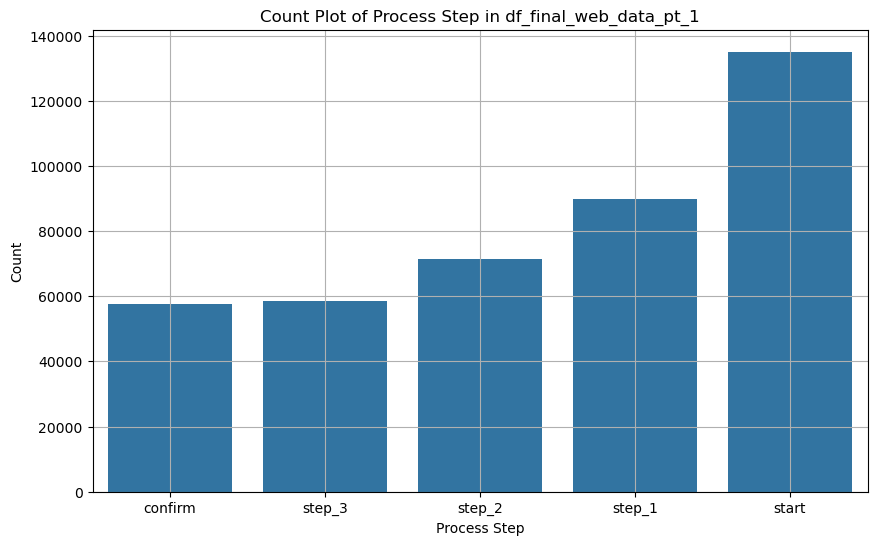

In [68]:
print(df_digital2['process_step'].value_counts())

# Bar plots for process_step in df_digital2

plt.figure(figsize=(10, 6))
sns.countplot(x='process_step', data=df_digital2)
plt.title('Count Plot of Process Step in df_final_web_data_pt_1')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [69]:
# Convert 'date_time' to datetime format

df_digital2['date_time'] = pd.to_datetime(df_digital2['date_time'])

# Extract date-time components

df_digital2['hour'] = df_digital2['date_time'].dt.hour
df_digital2['day_of_week'] = df_digital2['date_time'].dt.dayofweek
df_digital2['month'] = df_digital2['date_time'].dt.month

## Analyze Process Step vs. Time Components

### Process Step vs. Hour of the Day

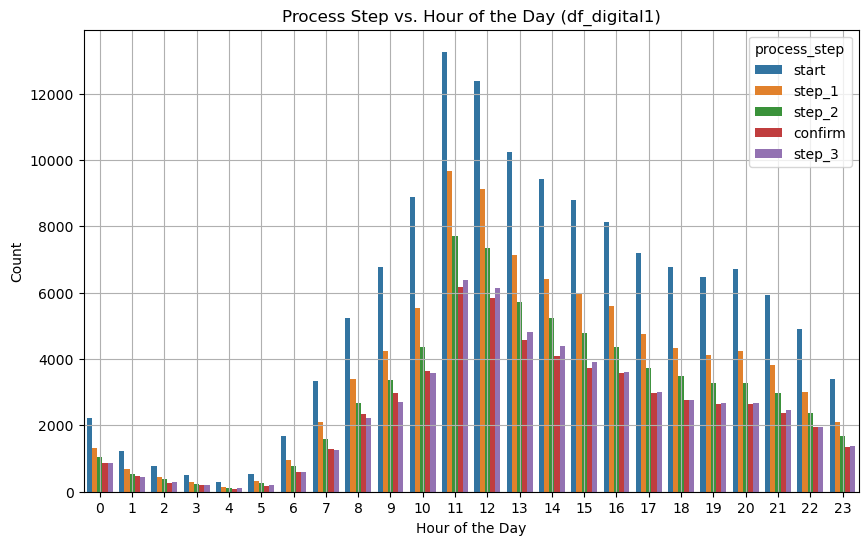

In [70]:
# Process Step vs. Hour of the Day for df_digital2

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='process_step', data=df_digital2)
plt.title('Process Step vs. Hour of the Day (df_digital1)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Process Step vs. Day of the Week

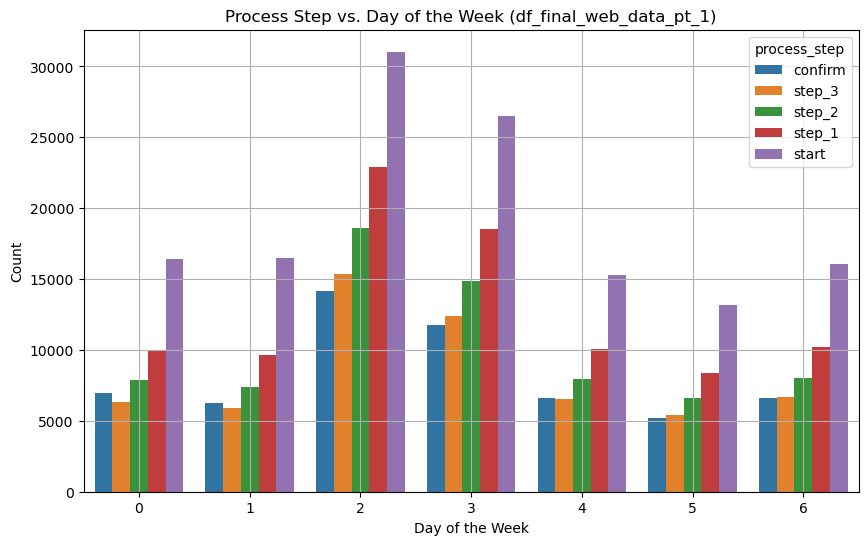

In [71]:
# Process Step vs. Day of the Week for df_digital2

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='process_step', data=df_digital2)
plt.title('Process Step vs. Day of the Week (df_final_web_data_pt_1)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Process Step vs. Month

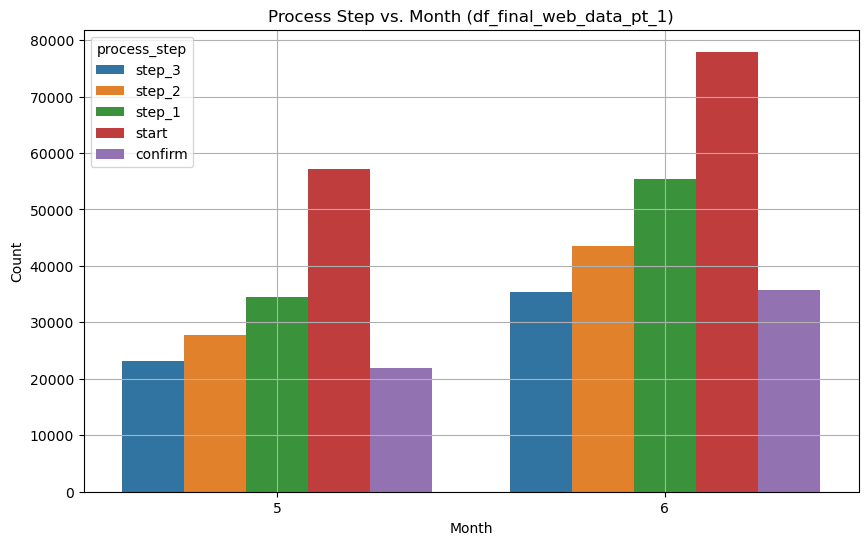

In [72]:
# Process Step vs. Month for df_digital2

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='process_step', data=df_digital2)
plt.title('Process Step vs. Month (df_final_web_data_pt_1)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Contingency table and chi-square test for process_step and month

In [73]:
# Create a contingency table for process_step in df_digital2

contingency_table_2 = pd.crosstab(df_digital2['process_step'], df_digital2['process_step'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table_2)
print(f'Chi-square test for df_final_web_data_pt_1: chi2 = {chi2_1}, p-value = {p_1}, dof = {dof_1}')
print('Expected Frequencies for df_final_web_data_pt_1:')
print(expected_1)

Chi-square test for df_final_web_data_pt_1: chi2 = 1649056.0, p-value = 0.0, dof = 16
Expected Frequencies for df_final_web_data_pt_1:
[[ 8036.4853589  18853.48854132 12532.36557158  9954.01645548
   8183.64407273]
 [18853.48854132 44230.03518377 29400.7641584  23351.99117556
  19198.72094095]
 [12532.36557158 29400.7641584  19543.39239177 15522.62805872
  12761.84981953]
 [ 9954.01645548 23351.99117556 15522.62805872 12329.0766014
  10136.28770885]
 [ 8183.64407273 19198.72094095 12761.84981953 10136.28770885
   8333.49745794]]


### Observations:

1.	Chi-square Statistic: The value of 1,649,056.0 is extremely high, indicating a significant deviation between the observed and expected frequencies.

2.	P-value: The p-value is 0.0, which is less than the typical significance level of 0.05. This indicates that the observed association between the variables is statistically significant and not due to random chance.

3.	Degrees of Freedom (dof): There are 16 degrees of freedom, which corresponds to the number of categories minus one for each variable.

4.	Expected Frequencies: These are the frequencies we would expect if there were no association between the variables.

# Experiment roster (df_final_experiment)

In [74]:
#import the data

df_experiment = pd.read_csv(experiment_roster)

df_experiment.sample(10)

,client_id,Variation
7116,3717232,Control
13563,6856197,Test
17971,9140320,Test
27818,1491537,Test
22771,2966471,Test
1860,7816330,Test
18636,9043926,Test
20583,2020919,Test
34727,153841,Control
55484,3302543,NaN


### Distribution of Control and Test Groups

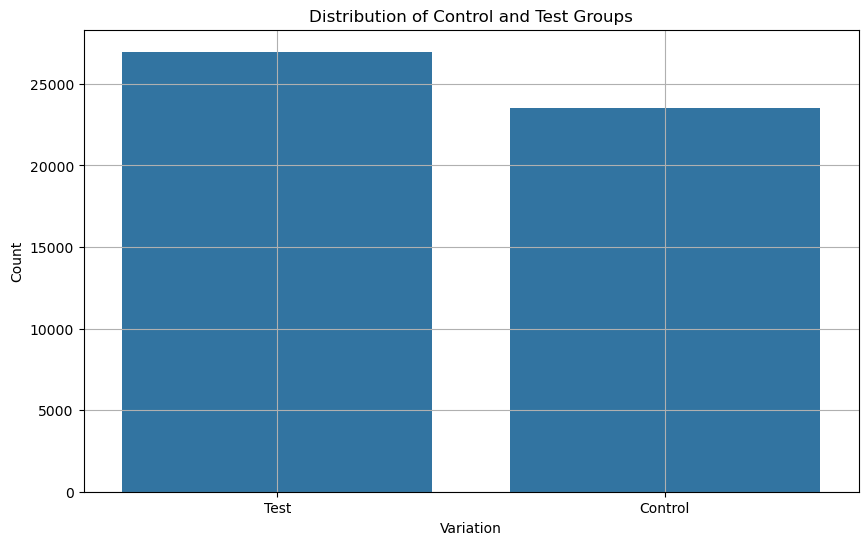

In [75]:
# Bar plot for Variation distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='Variation', data=df_experiment)
plt.title('Distribution of Control and Test Groups')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Chi-square 

- Given the current table with only client_id and Variation, performing a chi-square test would not be meaningful because the chi-square test is used to determine if there is a significant association between two categorical variables. 